In [1]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [2]:
from pycaret.clustering import *
from pycaret.clustering import setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel('/content/drive/My Drive/TP_Maestria/Fundamentos_Aprendizaje/Clustering/Reporte.xlsx')
df.head()

,Fecha de venta,Canal de Venta,Cliente,Provincia,Cantidad vendida,Precio unitario dolar,Precio de venta,Número de publicación,Categoría de la publicación
0,2024-01-30,Mercado Libre,AILENGUADALUPEMARTORELLA,Neuquén,6,4.088624,24.531745,MLA1401793983,"Hogar, Muebles y Jardín > Cuidado del Hogar y ..."
1,2024-01-30,Mercado Libre,ROSSOCRISTIAN20231018184201,CIUDAD AUTONOMA BUENOS AIRES,8,4.638652,37.109214,MLA1625102786,"Hogar, Muebles y Jardín > Cuidado del Hogar y ..."
2,2024-01-30,Mercado Libre,SILVYN2011,Buenos Aires,1,4.088624,4.088624,MLA1401793983,"Hogar, Muebles y Jardín > Cuidado del Hogar y ..."
3,2024-01-30,Mercado Libre,J4NU$,Capital Federal,10,4.088624,40.886242,MLA1401793983,"Hogar, Muebles y Jardín > Cuidado del Hogar y ..."
4,2024-01-30,Mercado Shops,ALEXISMARILINREINERT,Misiones,1,2.315452,2.315452,MLA1521716292,"Hogar, Muebles y Jardín > Bazar y Cocina > Vaj..."


Ya se hizo el EDA se redujeron las dimensiones y reemplazo de valores nulos

In [6]:
df.shape

(28133, 9)

In [7]:
#Elimino columnas y sólo quedo con las esenciales
data = df.drop(['Canal de Venta', 'Cantidad vendida', 'Precio unitario dolar', 'Categoría de la publicación'], axis=1)

In [8]:
#Renombro las columnas
data = data.rename(columns={'Fechas de venta': 'Fecha', 'Precio de venta': 'Venta', 'Número de publicación':'Codigo_producto' })
data=data.rename(columns={'Fecha de venta': 'Fecha'})
data.head()

,Fecha,Cliente,Provincia,Venta,Codigo_producto
0,2024-01-30,AILENGUADALUPEMARTORELLA,Neuquén,24.531745,MLA1401793983
1,2024-01-30,ROSSOCRISTIAN20231018184201,CIUDAD AUTONOMA BUENOS AIRES,37.109214,MLA1625102786
2,2024-01-30,SILVYN2011,Buenos Aires,4.088624,MLA1401793983
3,2024-01-30,J4NU$,Capital Federal,40.886242,MLA1401793983
4,2024-01-30,ALEXISMARILINREINERT,Misiones,2.315452,MLA1521716292


In [9]:
# Agregar ventas por cliente y provincia
data_grupo = data.groupby(['Cliente', 'Provincia']).agg({'Venta': 'sum'}).reset_index()

# Visualizar las primeras filas del dataset agrupado
print(data_grupo.head ())



           Cliente        Provincia      Venta
0          #ERROR!  Capital Federal  16.591118
1      *MARIANITA*  Capital Federal  15.820312
2  -CABEZADENOVIA-  Capital Federal   6.760200
3           .AGOS.     Buenos Aires  23.246948
4     .YASTERHAUS.     Buenos Aires   9.998872


In [10]:
data_grupo.shape

(12035, 3)

In [11]:
from pycaret.clustering import *

# Inicializar setup de clustering
setup(data_grupo, normalize=True, session_id=123)

# Entrenar modelo de clustering
kmeans = create_model('kmeans', num_clusters=4)


,Description,Value
0,Session id,123
1,Original data shape,"(12035, 3)"
2,Transformed data shape,"(12035, 12079)"
3,Numeric features,1
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0006,2.1835,50.6511,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

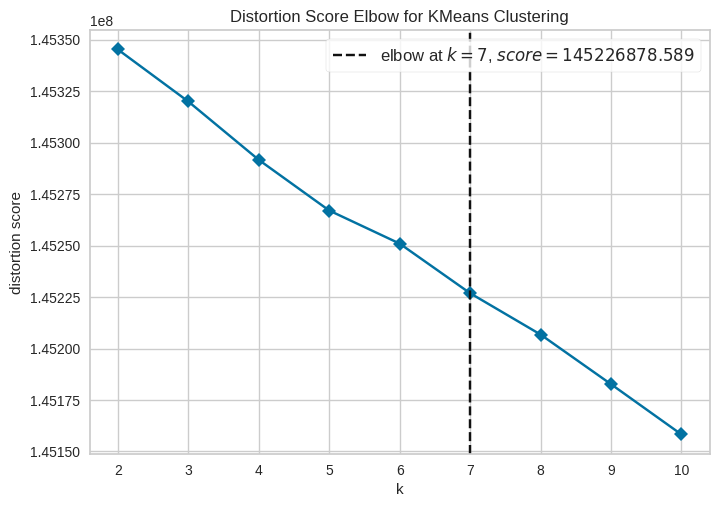

In [12]:
# Gráfico de codos
plot_model(kmeans, plot='elbow')


In [13]:
# Entrenar modelo de clustering
kmeans = create_model('kmeans', num_clusters=7)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0005,1.9862,37.9382,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

sigue siendo un mal modelo